In [33]:
import numpy as np
import pandas as pd
import scipy.io
import random
import matplotlib.pyplot as plt
import math

In [2]:
data_set = scipy.io.loadmat('kmeans1.mat')
data_set.keys()

dict_keys(['__header__', '__version__', '__globals__', 'kmeans1'])

In [3]:
features = data_set['kmeans1']
df = pd.DataFrame(data=features)

Text(0.5, 1.0, 'Original Data')

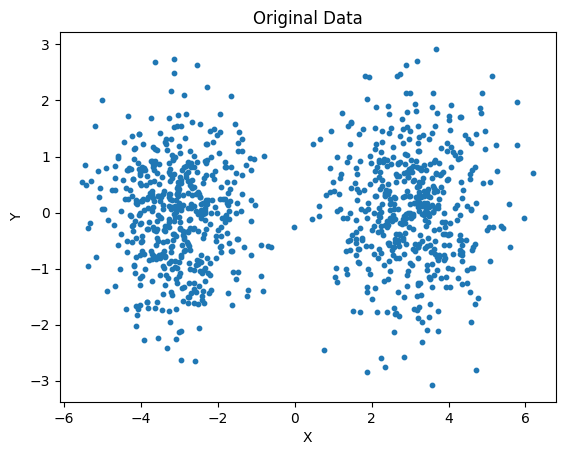

In [26]:
plt.scatter(df[0], df[1], s = 10, marker = "o")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Original Data")

In [98]:
def kmeans(data, k):
    data_tracker = data.copy()
    data_tracker["Prev Cluster"] = np.nan
    can_reallocate = True
    centroid_history = []

    # Initializing the random starting centroids
    centroids_index = random.sample(range(0, len(df)+1), k)
    centroids = np.zeros((k,2))
    clusters = {}
    for j, index in enumerate(centroids_index):
        centroids[j] = data.iloc[index]
        clusters[j] = []
    
    while can_reallocate:
        centroid_history.append(np.copy(centroids))
        is_cluster_different = []
        
        
        # Calculating distance from centroids for each data point
        for p in range(0,len(df)):
            data_point = data.iloc[p].to_numpy()
            closest_centroid_index = -1
            closest_centroid_distance = 10000

            # finding the closest centroid
            for i, c in enumerate(centroids):
                dist = np.linalg.norm(c - data_point)
                if dist < closest_centroid_distance:
                    closest_centroid_distance = dist
                    closest_centroid_index = i
                
            # Allocating points to centroid
            clusters[closest_centroid_index].append(data_point)
            is_cluster_different.append(data_tracker["Prev Cluster"][p] == closest_centroid_index)
            data_tracker.loc[p, "Prev Cluster"] = closest_centroid_index

        can_reallocate = False in is_cluster_different

        # Recalculating centroids
        if can_reallocate:
            for i, c in enumerate(clusters):
                centroids[i] = np.average(clusters[c], axis=0)
                clusters[i] = []
    
    return centroids, centroid_history, clusters


In [158]:
# With help from https://muthu.co/mathematics-behind-k-mean-clustering-algorithm/ 
def plot_clusters(clusters, centroids, k):
    fig = plt.figure()
    for cluster in clusters.values():
        cluster = pd.DataFrame(cluster)
        fig = plt.scatter(cluster[0], cluster[1], s = 10, marker = "o")
        for centroid in centroids:
            fig = plt.plot(centroid[0], centroid[1], marker = "x", c = "black")
    fig = plt.xlabel("X")
    fig = plt.ylabel("Y")
    fig = plt.title("Data Separated into k=" + str(k) + " Clusters")
    fig = plt.savefig(f"Clusters_{k}.png")
    fig = plt.close()

In [159]:
def plot_centroids(centroid_history, k):
    fig = plt.figure()
    for i, step in enumerate(centroid_history):
        if i < len(centroid_history)-1:
            prev_step = centroid_history[i+1]
        for j, point in enumerate(step):
            fig = plt.plot(point[0], point[1], c="black", marker="o", markersize=2)

            if i < len(centroid_history)-1:
                prev_point = prev_step[j]
                fig = plt.arrow(point[0], point[1], prev_point[0]-point[0], prev_point[1]-point[1], length_includes_head=True, color="red",head_width=0.05)
    fig = plt.xlabel("X")
    fig = plt.ylabel("Y")
    fig = plt.title("Movement of Centroids for k=" + str(k) + " Clusters")
    fig = plt.savefig(f"Centroid_History_{k}.png")
    fig = plt.close()

In [160]:
for k in [2,4,8]:
    centroids, history, clusters = kmeans(df,k)
    plot_clusters(clusters, centroids, k)
    plot_centroids(history, k)